# Chapter 4: Decision Trees

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report

## 4.1 Introduction & Motivation

Now we've gotten our introduction to classification models, we'll get on further by introducing one of the more intuitive classifiers: **decision trees**.

Consider the following decision tree which we can use to classify animals into their respective families:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.08-decision-tree.png?raw=1)

This is a type of decision tree which we can easily model by hand using tons and tons of $if-else$ statements. However, we can also teach a computer to decide themselves where and when to split in decision! This type of classifier is called a decision tree.

## 4.2 Problem Setting

In our setup of the Decision Tree Classifier, we will use the same dataset as we have done with the Logistic Regression Model. This will later on allow us to compare these two models. The following section should be clear (if not, revisit the previous chapter):

In [3]:
digits = datasets.load_digits()
dir(digits)
# data
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


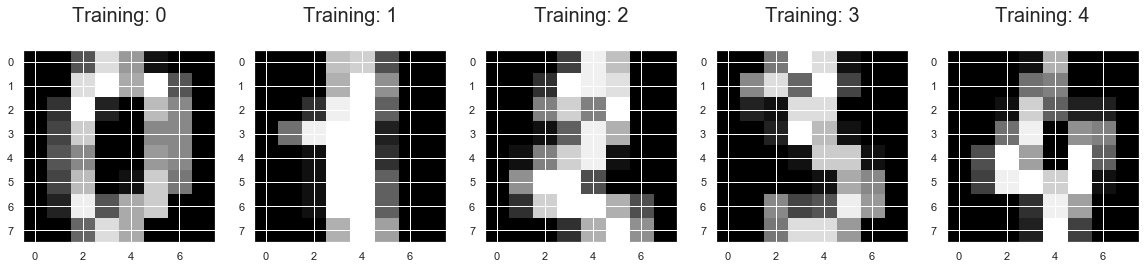

In [4]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

## 4.3 Model

### 4.3.1 Model

As the concrete setup of the decision tree classifier is rather theoretic, we will explain the idea behind the model by using an illustration.

As a short example, consider the following classification problem:

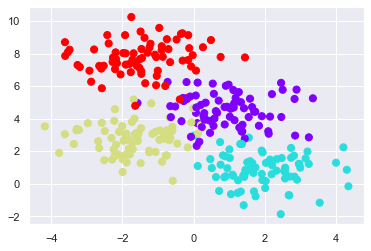

In [4]:
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

Note that both axes represent indepent variables, and the color of the dots depresent the categories (dependent variable).

When we start fitting a decision tree, the model will at every step try to draw a line through the dataset, thereby splitting it up in 2 new groups: the line is drawn such that as much as possible a certain group is isolated from the rest. This process is repeated until a desirable prediction accuracy is achieved. An example of this process is illustrated:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.08-decision-tree-levels.png?raw=1)

### 4.3.2 Model Estimation

Once again, we start off by splitting up the dataset:

In [6]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

Analogous to Logistic Regression, we make our classifier and fit it on our data:

In [8]:
tree = DecisionTreeClassifier()
tree_fit = tree.fit(x_train, y_train)

Finally, we use our model to make predictions over our test set:

In [10]:
predictions = tree.predict(x_test)

## 4.4 Model Evaluation

### Accuracy

To evaluate our model, we'll once again calculate the accuracy and the prediction.

In [12]:
score = tree_fit.score(x_test, y_test)
print(score)

0.8577777777777778


##### Question 1: Interpret the accuracy of this model. Based upon this, would you prefer the decision tree or the logistic regression classifyer for this dataset?

### Precision

In [13]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        37
           1       0.83      0.91      0.87        43
           2       0.90      0.84      0.87        44
           3       0.77      0.80      0.78        45
           4       0.86      0.84      0.85        38
           5       0.82      0.85      0.84        48
           6       0.98      0.98      0.98        52
           7       0.95      0.85      0.90        48
           8       0.82      0.77      0.80        48
           9       0.74      0.83      0.78        47

    accuracy                           0.86       450
   macro avg       0.86      0.86      0.86       450
weighted avg       0.86      0.86      0.86       450



##### Question 2: Interpret the precision of this model. Based upon this, would you prefer the decision tree or the logistic regression classifyer for this dataset?

### Confusion Matrix

In [14]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[33  0  0  0  1  1  0  0  0  2]
 [ 0 39  0  1  1  0  0  0  2  0]
 [ 1  3 37  1  1  0  0  0  1  0]
 [ 0  1  3 36  0  0  0  0  4  1]
 [ 1  1  0  0 32  0  1  1  0  2]
 [ 0  0  1  3  0 41  0  1  0  2]
 [ 0  0  0  0  0  0 51  0  0  1]
 [ 0  0  0  0  1  2  0 41  1  3]
 [ 0  2  0  4  0  2  0  0 37  3]
 [ 0  1  0  2  1  4  0  0  0 39]]


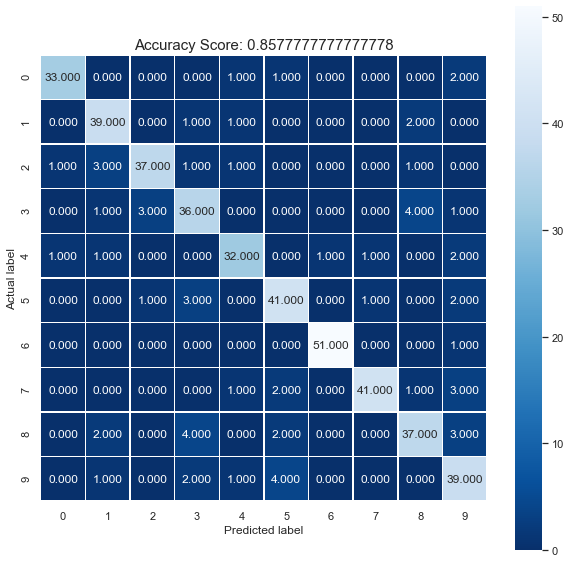

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

##### Question 3: Interpret the Confusion Matrix of this model. Based upon this, would you prefer the decision tree or the logistic regression classifyer for this dataset?

## 4.5 Exercises

##### Question 1: 
See section 4.4
##### Question 2: 
See section 4.4
##### Question 3: 
See section 4.4
##### Question 4:
We can easily put the accuracy and precision of two models, next to each other. But comparing the Confusion Matrices is a little bit more difficult. Make a matrix illustration of the differences in prediction betwen the Logistic Regression and the Decision Tree Classifier.
##### Question 5:
Time to do some research! What are the advantages and the disadvantages of logistic regression versus decision trees. In which situations, or on which type of data is either of these models preferable?